In [1]:
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

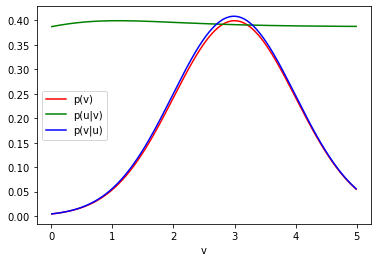

2.98

In [2]:
u = 0.75
sigma_u = 1
vp = 3
sigma_p = 1
v = np.arange(0.01, 5, 0.01)

# k = 4

dt = 0.01

PUV = norm.pdf(u, 1/(1+np.exp(-v)), sigma_u)
PV = norm.pdf(v, vp, sigma_p)
numer = PUV * PV
denom = np.sum(numer * dt) # 分母＝分子をvで積分
PVU = numer / denom

plt.plot(v, PV, color='r', label='p(v)')
plt.plot(v, PUV, color='g', label='p(u|v)')
plt.plot(v, PVU, color='b', label='p(v|u)')
plt.xlabel('v')
plt.legend()
plt.show()

np.argmax(PVU)/100

In [3]:
phi = list(range(5000))
phi[0] = vp
ep = list(range(5000))
ep[0] = 0
eu = list(range(5000))
eu[0] = (u - 1/(1+np.exp(-phi[0]))) / sigma_u

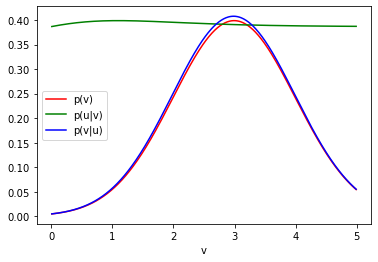

2.98
2.97
2.984382814557108
-0.009249248006084046
-0.20186358694215717


In [73]:
# 推測
for j in range(1, 5000):
    phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * 1 / (1 + np.exp(-phi[j-1])) * (1 - 1 / (1 + np.exp(-phi[j-1]))))
    ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
    eu[j] = eu[j-1] + dt * (u - 1 / (1 + np.exp(-phi[j-1])) - sigma_u * eu[j-1])

phi[0] = phi[-1]
ep[0] = ep[-1]
eu[0] = eu[-1]

# 学習
vp = vp + ep[-1] * dt
sigma_p = max(sigma_p + 1/2 * (ep[-1]**2 - 1/sigma_p), 1)
sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u), 1) 

PUV = norm.pdf(u, 1/(1+np.exp(-v)), sigma_u)
PV = norm.pdf(v, vp, sigma_p)
numer = PUV * PV
denom = np.sum(numer * dt) # 分母＝分子をvで積分
PVU = numer / denom

plt.plot(v, PV, color='r', label='p(v)')
plt.plot(v, PUV, color='g', label='p(u|v)')
plt.plot(v, PVU, color='b', label='p(v|u)')
plt.xlabel('v')
plt.legend()
plt.show()

print(np.argmax(PV)/100)
print(np.argmax(PVU)/100)
print(phi[-1])
print(ep[-1])
print(eu[-1])